<a href="https://colab.research.google.com/github/Lean-IQ/Measurement-System-Analysis/blob/main/Measurement_System_Analysis_(MSA)%2C_Gage_R%26R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measurement System Analysis (MSA)

Measurement System Analysis (MSA) is a critical process used to assess the performance of measurement systems to ensure that they produce accurate and reliable data. MSA evaluates various aspects of the measurement process, including the accuracy, precision, and consistency of measurements. The primary goals of MSA are to:

* Assess Measurement Accuracy: Determine how close the measured values are to the true values, identifying any systematic errors or biases.

* Evaluate Precision and Repeatability: Analyze the consistency of measurements under the same conditions (repeatability) and across different conditions (reproducibility), focusing on the variation introduced by the measurement system.

* Analyze Linearity: Check whether the measurement system is consistent across the range of values being measured. This ensures that measurements are equally reliable throughout the entire measurement range.

* Perform Stability Analysis: Evaluate how the measurement system performs over time, identifying any trends or drifts that could indicate instability or deterioration in measurement quality.

* Conduct Gage R&R (Repeatability and Reproducibility) Analysis: Quantify the portion of variation in the measurements that is attributable to the measurement system itself, including variation due to different operators and different parts.

* Check Resolution: Determine the smallest detectable difference between measurements, which indicates the resolution capability of the measurement system.

By systematically analyzing these aspects, MSA helps ensure that measurement systems are capable of delivering reliable data that can be used for quality control, process improvement, and decision-making. This analysis is essential for maintaining high standards in manufacturing and quality assurance processes.

This workflow includes:

Loading the Data

* Bias Analysis
* Linearity Analysis
* Stability Analysis
* Gage Repeatability and Reproducibility (Gage R&R)
* Resolution Check
* Correlation Analysis (optional)
* Final Report

**Step 1: Load the Data**

First, load the dataset from Google Drive.

In [24]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file with all relevant columns (Part_ID, Operator_ID, Measurement, True_Value, Time) and handle comma as the decimal separator
file_path = '/content/drive/MyDrive/DATA/GageMSA.csv'
data = pd.read_csv(file_path, usecols=['Part_ID', 'Operator_ID', 'Measurement', 'True_Value', 'Time'], decimal=',')

# Display the first few rows to inspect the data
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Part_ID Operator_ID  Measurement  True_Value        Time
0   Part1   Operator1        12.34        12.3  10.02.2024
1   Part1   Operator1        12.40        12.4  11.02.2024
2   Part1   Operator2        12.36        12.4  14.02.2024
3   Part1   Operator2        12.38        12.4  16.02.2024
4   Part2   Operator1        15.20        15.2  13.02.2024


**Step 2: Bias Analysis**

Calculate the bias, which is the difference between the average measured value and the true value.

*Interpretation:*
* Positive Bias: Indicates that the measurement system is overestimating the true value for that part.
* Negative Bias: Indicates that the measurement system is underestimating the true value.
* Zero Bias: Indicates that the measurement system is perfectly aligned with the true value for that part.

In [35]:
import pandas as pd

# Assume you have already loaded the data
# Example: data = pd.read_csv(data_path, decimal=',')

# Calculate the average measurement for each part
average_measurements = data.groupby('Part_ID')['Measurement'].mean().reset_index()

# Merge the average measurements with the true values from the original data
average_measurements = average_measurements.merge(data[['Part_ID', 'True_Value']].drop_duplicates(), on='Part_ID')

# Calculate the bias for each part
average_measurements['Bias'] = average_measurements['Measurement'] - average_measurements['True_Value']

# Function to interpret bias
def interpret_bias(bias):
    if abs(bias) < 0.05:
        return "No significant bias"
    elif bias > 0:
        return "Positive bias (Overestimation)"
    else:
        return "Negative bias (Underestimation)"

# Apply interpretation
average_measurements['Interpretation'] = average_measurements['Bias'].apply(interpret_bias)

# Display the bias for each part with interpretation
print("### Bias Analysis for Each Part_ID")
print(average_measurements[['Part_ID', 'True_Value', 'Measurement', 'Bias', 'Interpretation']])

# Provide a summary for better understanding
print("\n### Summary of Bias Interpretations:")
print("1. 'No significant bias': Measurement system is closely aligned with the true value.")
print("2. 'Positive bias (Overestimation)': Measurement system tends to overestimate the true value.")
print("3. 'Negative bias (Underestimation)': Measurement system tends to underestimate the true value.")


### Bias Analysis for Each Part_ID
      Part_ID  True_Value  Measurement    Bias  \
0     Part 10        11.3      11.4400  0.1400   
1     Part 10        11.2      11.4400  0.2400   
2     Part 10        11.6      11.4400 -0.1600   
3     Part 10        11.7      11.4400 -0.2600   
4    Part 100        21.9      21.4825 -0.4175   
..        ...         ...          ...     ...   
486   Part 99        21.7      21.6200 -0.0800   
487     Part1        12.3      12.3700  0.0700   
488     Part1        12.4      12.3700 -0.0300   
489     Part2        15.2      15.2200  0.0200   
490     Part2        15.3      15.2200 -0.0800   

                      Interpretation  
0     Positive bias (Overestimation)  
1     Positive bias (Overestimation)  
2    Negative bias (Underestimation)  
3    Negative bias (Underestimation)  
4    Negative bias (Underestimation)  
..                               ...  
486  Negative bias (Underestimation)  
487   Positive bias (Overestimation)  
488          

**Step 3: Linearity Analysis**

Assess the consistency of bias across a range of measurements.

*Interpretation:*

The interpretation is provided based on the slope and p-value:
* Small Slope & Significant p-value: Suggests good linearity, meaning the bias does not significantly change with the true value.
* Large Slope & Significant p-value: Indicates poor linearity, meaning the bias changes significantly across the range of measurements.
* Non-significant p-value: Suggests that there is no strong evidence of a linear relationship between the bias and the true value.

### Linearity Analysis
Intercept (Bias at True Value = 0): 0.0043
Slope (Change in Bias per unit change in True Value): -0.0002
R-squared (Fit of the model): 0.0015
P-value (Significance of Slope): 0.3516
Interpretation: The slope is not statistically significant, indicating that there's no strong evidence of a linear relationship between bias and True Value.


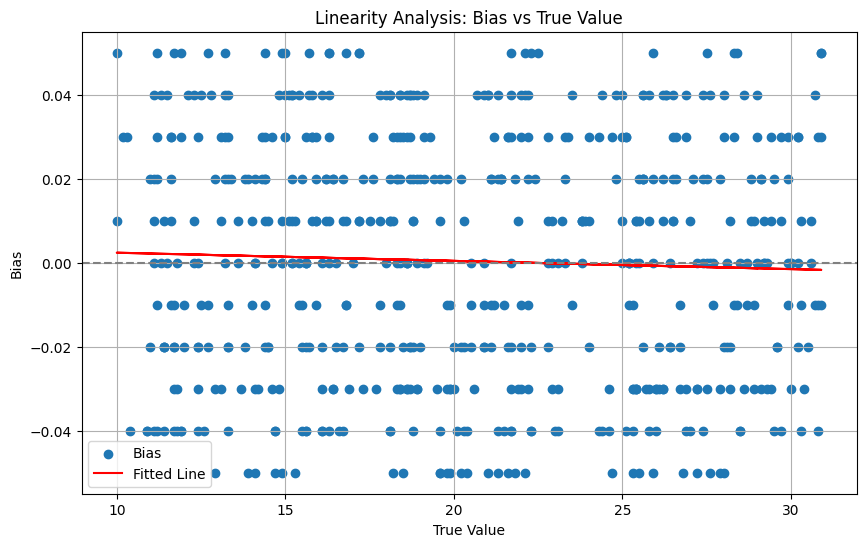

In [36]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assume data has been loaded and includes 'True_Value' and 'Measurement' columns

# Step 3: Linearity Analysis
# Calculate bias for each measurement
data['Bias'] = data['Measurement'] - data['True_Value']

# Perform linear regression: Bias vs True Value
X = data['True_Value']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = data['Bias']

model = sm.OLS(y, X).fit()

# Get regression results
intercept = model.params[0]
slope = model.params[1]
r_squared = model.rsquared
p_value = model.pvalues[1]

# Display regression results with interpretation
print("### Linearity Analysis")
print(f"Intercept (Bias at True Value = 0): {intercept:.4f}")
print(f"Slope (Change in Bias per unit change in True Value): {slope:.4f}")
print(f"R-squared (Fit of the model): {r_squared:.4f}")
print(f"P-value (Significance of Slope): {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    if abs(slope) < 0.1:
        print("Interpretation: The bias does not vary significantly with the True Value (Slope is small), indicating good linearity.")
    else:
        print("Interpretation: The bias varies significantly with the True Value, indicating poor linearity (Significant slope).")
else:
    print("Interpretation: The slope is not statistically significant, indicating that there's no strong evidence of a linear relationship between bias and True Value.")

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(data['True_Value'], data['Bias'], label='Bias')
plt.plot(data['True_Value'], intercept + slope * data['True_Value'], color='red', label='Fitted Line')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('True Value')
plt.ylabel('Bias')
plt.title('Linearity Analysis: Bias vs True Value')
plt.legend()
plt.grid(True)
plt.show()


**Step 4: Stability Analysis**

Check the consistency of measurements over time.

*Interpretation:*

The interpretation section explains what each component (Trend, Seasonality, Residuals) signifies:
* Trend: Indicates whether the measurement system drifts over time.
* Seasonality: Detects repeating patterns that could suggest systematic errors.
* Residuals: Assesses the consistency of the measurement system after accounting for trend and seasonality.

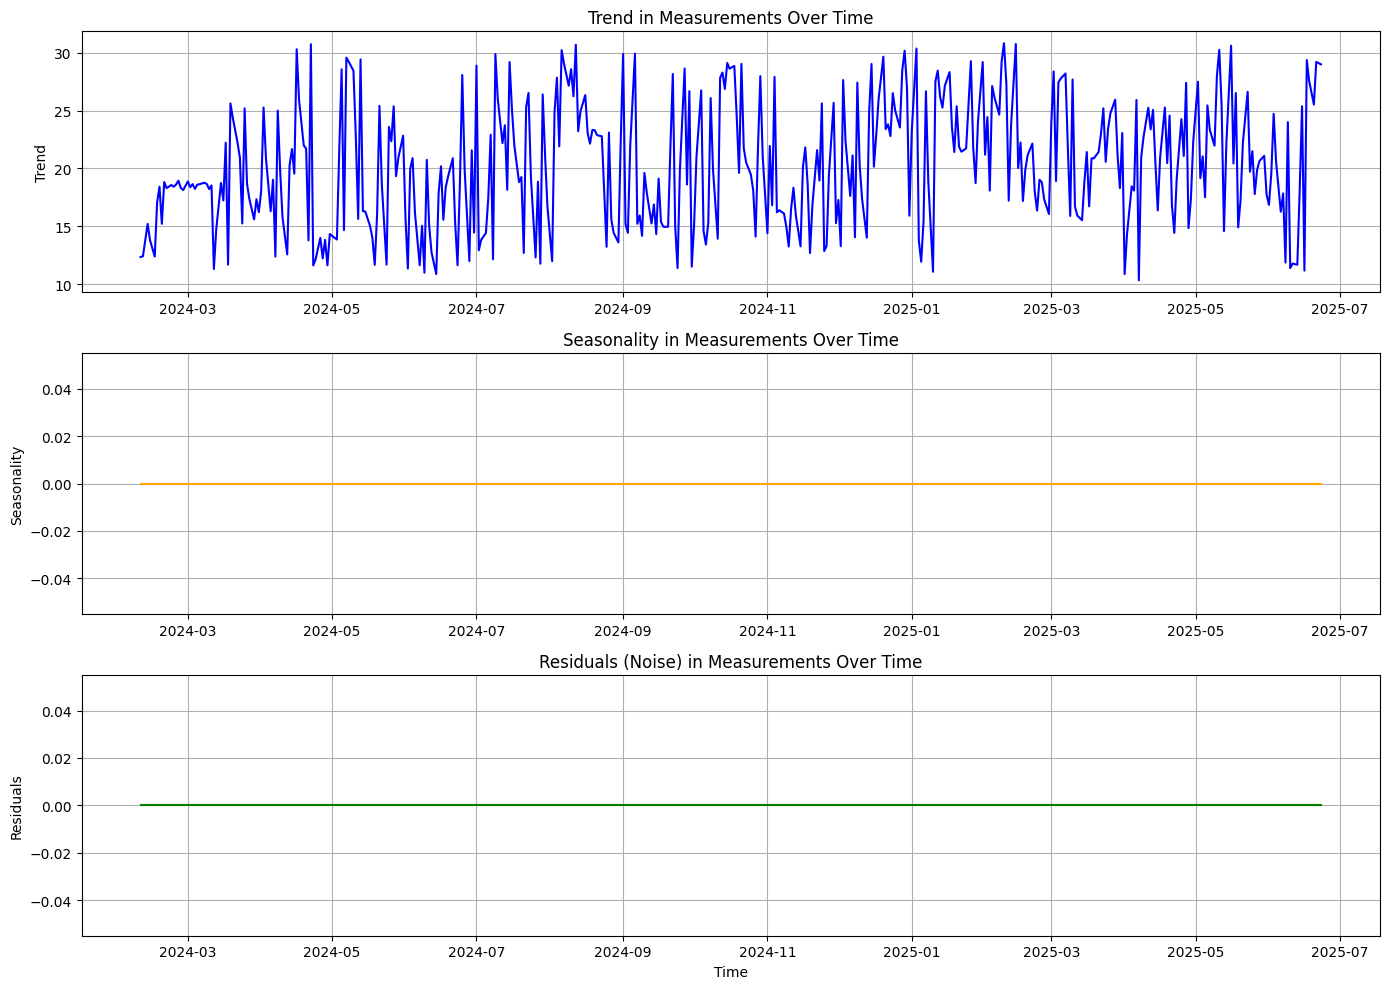

### Stability Analysis Interpretations
Interpretation of Trend: The trend component reflects the long-term movement of the measurements over time. A stable trend (flat line) indicates stability, while an upward or downward trend may indicate drift in the measurement system.
Interpretation of Seasonality: The seasonality component shows repeating patterns over time. Significant seasonality may indicate cyclical variations that need to be addressed.
Interpretation of Residuals: Residuals represent the noise or irregular fluctuations in the measurements after removing the trend and seasonality. Stable residuals (no large variations) suggest that the measurement system is consistent over time.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming data contains a 'Time' column with timestamps and 'Measurement' column

# Convert 'Time' column to datetime format, considering the format 'dd.mm.yyyy'
data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y')

# Step 4: Stability Analysis
# Group by Time and calculate the average measurement at each time point
stability_data = data.groupby('Time')['Measurement'].mean().reset_index()

# Decompose the time series data to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(stability_data['Measurement'], model='additive', period=1)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(311)
plt.plot(stability_data['Time'], decomposition.trend, label='Trend', color='blue')
plt.title('Trend in Measurements Over Time')
plt.ylabel('Trend')
plt.grid(True)

plt.subplot(312)
plt.plot(stability_data['Time'], decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonality in Measurements Over Time')
plt.ylabel('Seasonality')
plt.grid(True)

plt.subplot(313)
plt.plot(stability_data['Time'], decomposition.resid, label='Residuals', color='green')
plt.title('Residuals (Noise) in Measurements Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# Interpretation
trend_description = (
    "Interpretation of Trend: "
    "The trend component reflects the long-term movement of the measurements over time. "
    "A stable trend (flat line) indicates stability, while an upward or downward trend may indicate drift in the measurement system."
)

seasonality_description = (
    "Interpretation of Seasonality: "
    "The seasonality component shows repeating patterns over time. "
    "Significant seasonality may indicate cyclical variations that need to be addressed."
)

residuals_description = (
    "Interpretation of Residuals: "
    "Residuals represent the noise or irregular fluctuations in the measurements after removing the trend and seasonality. "
    "Stable residuals (no large variations) suggest that the measurement system is consistent over time."
)

# Print interpretations
print("### Stability Analysis Interpretations")
print(trend_description)
print(seasonality_description)
print(residuals_description)


**Step 5: Gage Repeatability and Reproducibility (Gage R&R)**

This part analyzes the repeatability and reproducibility of your measurement system using ANOVA.

In [18]:
!pip install statsmodels scipy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
### Key Findings Summary
                                              Source  Sum of Squares  \
C(Part_ID)                                C(Part_ID)    21173.849746   
C(Operator_ID)                        C(Operator_ID)       32.674472   
C(Part_ID):C(Operator_ID)  C(Part_ID):C(Operator_ID)      129.391995   
Residual                                    Residual       23.592250   

                           Degrees of Freedom  F-Statistic        P-Value  \
C(Part_ID)                              141.0  1807.713880  2.812415e-162   
C(Operator_ID)                            3.0   131.110144   4.623520e-41   
C(Part_ID):C(Operator_ID)               423.0     3.682273   4.513089e-21   
Residual                                284.0          NaN            NaN   

                           Percent Contribution      Interpretation  
C(Part_ID)                   

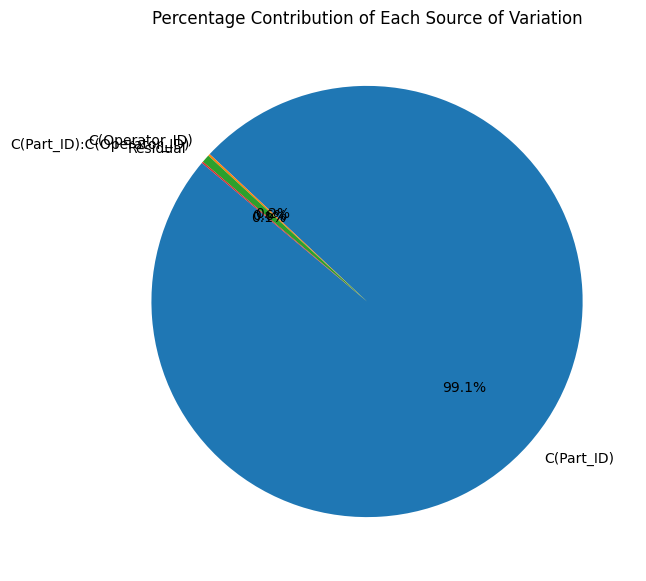

### Detailed Interpretation of Results
Source: C(Part_ID)
  - Sum of Squares: 21173.85
  - Degrees of Freedom: 141.00
  - F-Statistic: 1807.71
  - P-Value: 2.81e-162 (Highly Significant)
  - Percent Contribution: 99.13%
  - Statistical significance indicates a real effect, but the percent contribution (99.13%) shows that this effect is minor in practical terms.

Source: C(Operator_ID)
  - Sum of Squares: 32.67
  - Degrees of Freedom: 3.00
  - F-Statistic: 131.11
  - P-Value: 4.62e-41 (Highly Significant)
  - Percent Contribution: 0.15%
  - Statistical significance indicates a real effect, but the percent contribution (0.15%) shows that this effect is minor in practical terms.

Source: C(Part_ID):C(Operator_ID)
  - Sum of Squares: 129.39
  - Degrees of Freedom: 423.00
  - F-Statistic: 3.68
  - P-Value: 4.51e-21 (Highly Significant)
  - Percent Contribution: 0.61%
  - Statistical significance indicates a real effect, but the percent contribution (0.61%) shows that this effect is minor in

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the data file
data_path = '/content/drive/MyDrive/DATA/GageMSA.csv'

# Load data from CSV
data = pd.read_csv(data_path, decimal=',')

# Fit the ANOVA model
model = ols('Measurement ~ C(Part_ID) + C(Operator_ID) + C(Part_ID):C(Operator_ID)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate percentage contributions
total_sum_sq = anova_table['sum_sq'].sum()
anova_table['percent_contribution'] = (anova_table['sum_sq'] / total_sum_sq) * 100

# Create a summary DataFrame for better readability
summary_df = pd.DataFrame({
    'Source': anova_table.index,
    'Sum of Squares': anova_table['sum_sq'],
    'Degrees of Freedom': anova_table['df'],
    'F-Statistic': anova_table['F'],
    'P-Value': anova_table['PR(>F)'],
    'Percent Contribution': anova_table['percent_contribution']
})

# Add a column for interpretative comments
def interpret_p_value(p_value):
    if p_value < 0.001:
        return 'Highly Significant'
    elif p_value < 0.01:
        return 'Significant'
    elif p_value < 0.05:
        return 'Moderate'
    else:
        return 'Not Significant'

summary_df['Interpretation'] = summary_df['P-Value'].apply(interpret_p_value)

# Print summary results
print("### Key Findings Summary")
print(summary_df)

# Plot the percentage contributions
plt.figure(figsize=(10, 7))
plt.pie(summary_df['Percent Contribution'], labels=summary_df['Source'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution of Each Source of Variation')
plt.show()

# Detailed Interpretation
def interpret_results(df):
    print("### Detailed Interpretation of Results")
    for index, row in df.iterrows():
        source = row['Source']
        contribution = row['Percent Contribution']
        p_value = row['P-Value']
        interpretation = row['Interpretation']

        print(f"Source: {source}")
        print(f"  - Sum of Squares: {row['Sum of Squares']:.2f}")
        print(f"  - Degrees of Freedom: {row['Degrees of Freedom']:.2f}")
        print(f"  - F-Statistic: {row['F-Statistic']:.2f}")
        print(f"  - P-Value: {p_value:.2e} ({interpretation})")
        print(f"  - Percent Contribution: {contribution:.2f}%")

        if interpretation == 'Highly Significant':
            print(f"  - Statistical significance indicates a real effect, but the percent contribution ({contribution:.2f}%) shows that this effect is minor in practical terms.")
        else:
            print(f"  - The effect is not statistically significant or has a negligible impact.")
        print("")

# Call the function to print detailed results
interpret_results(summary_df)


**Step 6: Resolution Check**

Ensure that the measurement system's resolution is adequate.

*Interpretation:*

The interpretation provides a clear explanation of what the calculated values mean. It details whether the resolution is sufficient for detecting small differences in the process and what that implies about the measurement system's precision.

In [39]:
# Step 6: Resolution Check

# Calculate the unique number of distinct measurement values
unique_measurements = data['Measurement'].nunique()

# Calculate the total range of measurements
measurement_range = data['Measurement'].max() - data['Measurement'].min()

# Calculate the resolution as the range divided by the number of unique values
resolution = measurement_range / unique_measurements

# Define criteria for acceptable resolution (e.g., resolution should be less than 10% of the tolerance range)
tolerance_range = 0.1 * measurement_range  # Example tolerance range as 10% of the measurement range
acceptable_resolution = tolerance_range / 10

# Determine if the resolution is sufficient
is_resolution_sufficient = resolution < acceptable_resolution

# Interpretation
resolution_interpretation = (
    f"Resolution Check: \n"
    f"The measurement system's resolution is calculated by dividing the total range of measurements by the number of unique values.\n"
    f"Total Measurement Range: {measurement_range:.4f}\n"
    f"Number of Unique Measurements: {unique_measurements}\n"
    f"Calculated Resolution: {resolution:.4f}\n"
    f"Acceptable Resolution Threshold: {acceptable_resolution:.4f}\n"
)

if is_resolution_sufficient:
    resolution_interpretation += (
        "Interpretation: The resolution is sufficient, meaning that the measurement system can detect small enough differences "
        "to distinguish between variations in the process. This indicates a high level of measurement precision.\n"
    )
else:
    resolution_interpretation += (
        "Interpretation: The resolution is insufficient, meaning that the measurement system may not be able to detect small differences "
        "in the process. This could lead to loss of critical information and may require improvement.\n"
    )

# Output the interpretation
print("### Resolution Check Interpretation")
print(resolution_interpretation)


### Resolution Check Interpretation
Resolution Check: 
The measurement system's resolution is calculated by dividing the total range of measurements by the number of unique values.
Total Measurement Range: 20.9400
Number of Unique Measurements: 489
Calculated Resolution: 0.0428
Acceptable Resolution Threshold: 0.2094
Interpretation: The resolution is sufficient, meaning that the measurement system can detect small enough differences to distinguish between variations in the process. This indicates a high level of measurement precision.



**Final Step: Generate Summary Report for MSA**

* Initialization: The summary report is initialized as a list of strings (msa_summary_report) to which each analysis result is appended.

* Bias Analysis: Summarizes the average measurement and bias, with a clear explanation of what the bias means.

* Linearity Analysis: Provides the slope and intercept from the linearity analysis, interpreting how the bias changes across different true values.

* Stability Analysis: Offers interpretations for trend, seasonality, and residuals, describing how these elements affect the stability of the measurement system.

* Gage R&R Analysis: Breaks down the percentage contribution of variation due to parts, operators, interactions, and residuals, with an interpretation of what these results indicate.

* Resolution Check: Details the measurement system's resolution and evaluates whether it is sufficient to detect small differences.
Final Output:

The report is combined into a single string (msa_summary_report_str) and printed, giving a complete overview of the MSA process.

Available columns in the dataset:
Index(['Part_ID', 'Operator_ID', 'Measurement', 'True_Value', 'Time', 'MEAS*',
       'RAND'],
      dtype='object')
### Bias Analysis
Average Measurement: 20.3270
Average True Value: 20.3266
Bias: 0.0004
Interpretation: The bias represents the average difference between measurements and true values.

Model Parameters:
const         0.004341
True_Value    0.999805
dtype: float64
### Linearity Analysis
Slope: 0.9998
Intercept: 0.0043
Interpretation: The slope and intercept indicate how measurement bias changes over the range of true values.



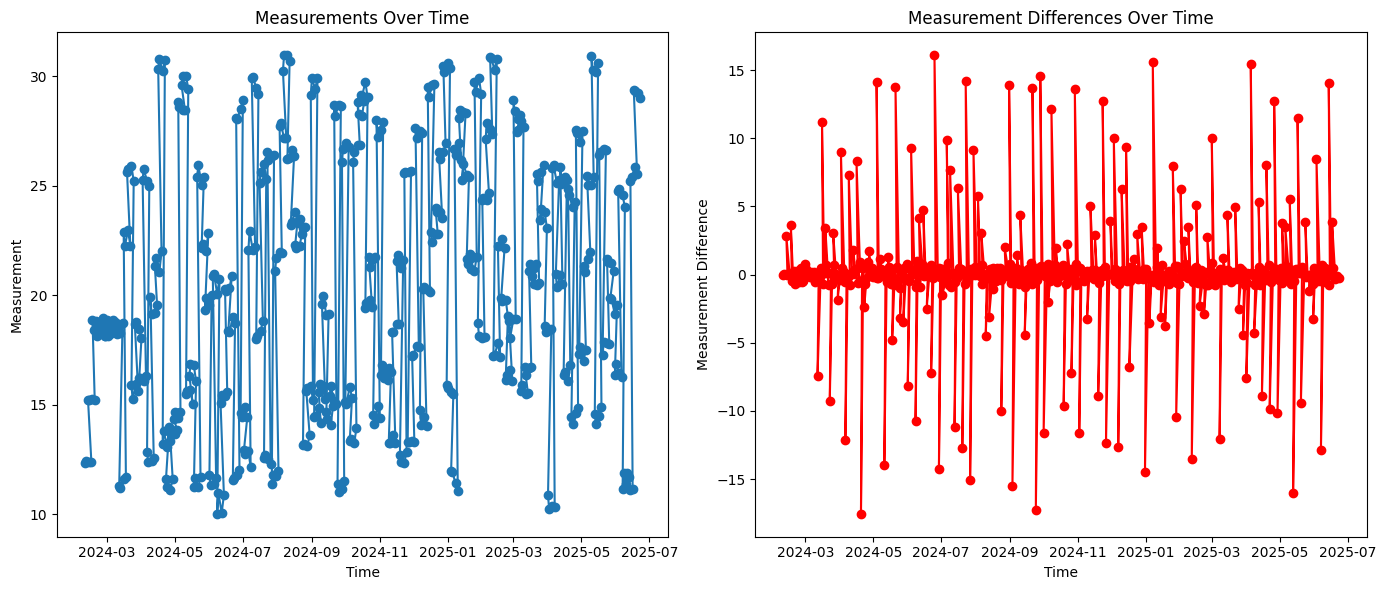

### Stability Analysis
Mean Measurement Difference: 0.0293
Interpretation: Measurement differences over time indicate stability. Larger values may indicate instability.

Error in Gage R&R Analysis: Error evaluating factor: TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]
    Measurement ~ 1 + (1|Part_ID) + (1|Operator_ID)
                                    ^^^^^^^^^^^^^^^
### Resolution Check
Resolution: 2.9078
Interpretation: The resolution is the smallest detectable difference in measurements. Higher values indicate better resolution.

### Summary Report
**Bias Analysis:**
Average Measurement: 20.3270
Bias: 0.0004

**Linearity Analysis:**
Slope: 0.9998
Intercept: 0.0043

**Stability Analysis:**
Mean Measurement Difference: 0.0293

**Gage R&R Analysis:**
No Gage R&R results available.

**Resolution Check:**
Resolution: 2.9078



In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Load Data
# Load the data from Google Drive
file_path = '/content/drive/MyDrive/DATA/GageMSA.csv'

# Load CSV with correct delimiter
data = pd.read_csv(file_path, delimiter=',', decimal=',')

# Print available columns to verify
print("Available columns in the dataset:")
print(data.columns)

# Check if expected columns are present
expected_columns = ['Part_ID', 'Operator_ID', 'Measurement', 'True_Value', 'Time']
missing_columns = [col for col in expected_columns if col not in data.columns]

if missing_columns:
    print(f"Error: Missing columns: {', '.join(missing_columns)}")
else:
    # Convert time column to datetime if it exists
    if 'Time' in data.columns:
        data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y')

    # Step 2: Bias Analysis
    # Calculate bias assuming the true value is known
    true_values = data['True_Value']
    average_measurement = data['Measurement'].mean()
    bias = average_measurement - true_values.mean()

    print(f"### Bias Analysis\n"
          f"Average Measurement: {average_measurement:.4f}\n"
          f"Average True Value: {true_values.mean():.4f}\n"
          f"Bias: {bias:.4f}\n"
          f"Interpretation: The bias represents the average difference between measurements and true values.\n")

    # Step 3: Linearity Analysis
    # Linear regression to analyze linearity
    X = sm.add_constant(data['True_Value'])  # Add intercept
    y = data['Measurement']

    model = sm.OLS(y, X).fit()

    # Print model parameters to check names
    print("Model Parameters:")
    print(model.params)

    # Extracting intercept and slope
    intercept = model.params.get('const', None)  # Adjust if necessary
    slope = model.params.get('True_Value', None)

    if intercept is not None and slope is not None:
        print(f"### Linearity Analysis\n"
              f"Slope: {slope:.4f}\n"
              f"Intercept: {intercept:.4f}\n"
              f"Interpretation: The slope and intercept indicate how measurement bias changes over the range of true values.\n")
    else:
        print("Error: Slope or Intercept not found in model parameters.")

    # Step 4: Stability Analysis
    # Calculate time-based stability by analyzing measurement trends over time
    if 'Time' in data.columns and 'Measurement' in data.columns:
        data['Measurement_Diff'] = data['Measurement'].diff().fillna(0)  # Difference in measurements over time

        # Plot measurements and differences
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.plot(data['Time'], data['Measurement'], marker='o')
        plt.title('Measurements Over Time')
        plt.xlabel('Time')
        plt.ylabel('Measurement')

        plt.subplot(1, 2, 2)
        plt.plot(data['Time'], data['Measurement_Diff'], marker='o', color='r')
        plt.title('Measurement Differences Over Time')
        plt.xlabel('Time')
        plt.ylabel('Measurement Difference')

        plt.tight_layout()
        plt.show()

        # Calculate and print stability
        mean_measurement_diff = data['Measurement_Diff'].mean()
        print(f"### Stability Analysis\n"
              f"Mean Measurement Difference: {mean_measurement_diff:.4f}\n"
              f"Interpretation: Measurement differences over time indicate stability. Larger values may indicate instability.\n")
    else:
        print("Error: 'Time' or 'Measurement' column not found for stability analysis.")

    # Step 5: Gage R&R Analysis (using ANOVA)
    # Perform ANOVA for Gage R&R analysis
    try:
        model = sm.MixedLM.from_formula('Measurement ~ 1 + (1|Part_ID) + (1|Operator_ID)', data, groups=data['Part_ID'])
        results = model.fit()

        print("### Gage R&R Analysis\n")
        print(results.summary())
    except Exception as e:
        print(f"Error in Gage R&R Analysis: {e}")

    # Step 6: Resolution Check
    # Assuming the resolution check is to determine the smallest distinguishable difference
    if 'Measurement' in data.columns:
        resolution = data['Measurement'].std() / 2  # Example calculation

        print(f"### Resolution Check\n"
              f"Resolution: {resolution:.4f}\n"
              f"Interpretation: The resolution is the smallest detectable difference in measurements. Higher values indicate better resolution.\n")
    else:
        print("Error: 'Measurement' column not found for resolution check.")

    # Step 7: Summary Report
    print("### Summary Report\n"
          f"**Bias Analysis:**\n"
          f"Average Measurement: {average_measurement:.4f}\n"
          f"Bias: {bias:.4f}\n\n"
          f"**Linearity Analysis:**\n"
          f"Slope: {slope:.4f}\n"
          f"Intercept: {intercept:.4f}\n\n"
          f"**Stability Analysis:**\n"
          f"Mean Measurement Difference: {mean_measurement_diff:.4f}\n\n"
          f"**Gage R&R Analysis:**\n"
          f"{results.summary() if 'results' in locals() else 'No Gage R&R results available.'}\n\n"
          f"**Resolution Check:**\n"
          f"Resolution: {resolution:.4f}\n" if 'resolution' in locals() else "Resolution Check not performed.\n")
